## 颜色

颜色格式：https://matplotlib.org/stable/users/explain/colors/colors.html#color-formats

透明度: `alpha`
透明度
颜色的 Alpha 值决定了其透明度，0 表示完全透明，1 表示完全不透明。当颜色为半透明时，背景色会透过半透明显示出来。

Alpha 值根据公式将前景色与背景色混合，从而确定最终颜色。

$$\text{RGB}_\text{result} = \text{RGB}_\text{background} \times (1 - \text{alpha}) + \text{RGB}_\text{foreground} \times \text{alpha}$$

### 导出的颜色列表

- matplotlib.colors.BASE_COLORS
- matplotlib.colors.TABLEAU_COLORS
- matplotlib.colors.CSS4_COLORS
- matplotlib.colors.XKCD_COLORS

In [1]:
%matplotlib widget
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

def plot_colortable(colors, *, ncols=4, sort_colors=True):
    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    if sort_colors:
        color_names = sorted(colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c)))) # Sort colors by hue, saturation, value and name.
    else:
        color_names = list(colors)
    nrows = math.ceil(len(color_names) / ncols)
    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72
    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height, (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_axis_off()

    for idx, color_name in enumerate(color_names):
        row = idx % nrows
        col = idx // nrows
        y = row * cell_height
        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7
        ax.text(text_pos_x, y, color_name, fontsize=14, horizontalalignment='left', verticalalignment='center')
        ax.add_patch(Rectangle(xy=(swatch_start_x, y-9), width=swatch_width, height=18, facecolor=colors[color_name], edgecolor='0.7'))
    return fig
    

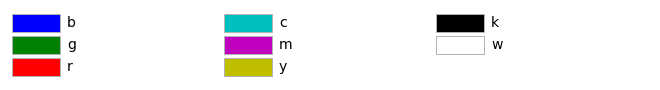

In [2]:
plot_colortable(mcolors.BASE_COLORS, ncols=3, sort_colors=False);

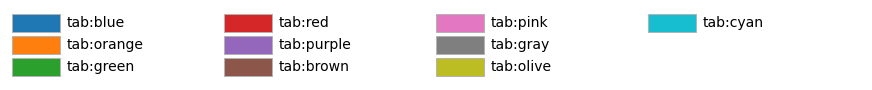

In [3]:
plot_colortable(mcolors.TABLEAU_COLORS, ncols=4, sort_colors=False);

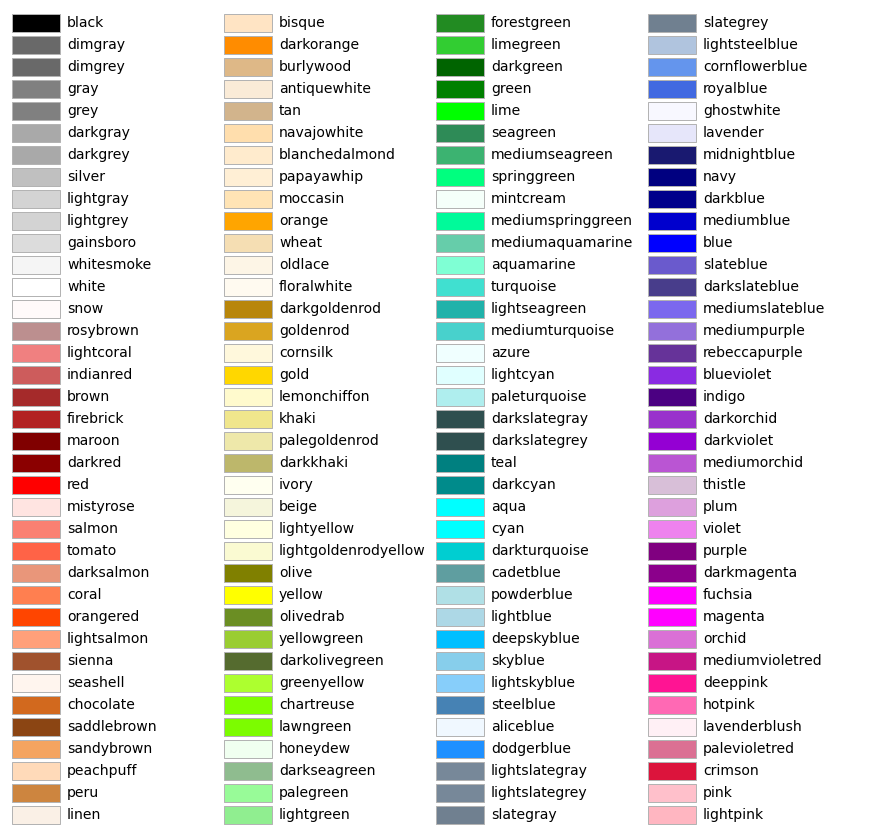

In [4]:
plot_colortable(mcolors.CSS4_COLORS, ncols=4, sort_colors=True);

### 透明度

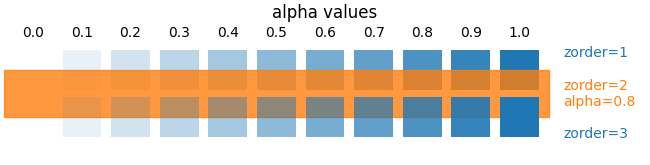

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(6.5, 1.65), layout='constrained')
ax.add_patch(Rectangle((-0.2, -0.35), 11.2, 0.7, color='C1', alpha=0.8))
for i, alpha in enumerate(np.linspace(0, 1, 11)):
    ax.add_patch(Rectangle((i, 0.05), 0.8, 0.6, alpha=alpha, zorder=0))
    ax.text(i+0.4, 0.85, f"{alpha:.1f}", ha='center')
    ax.add_patch(Rectangle((i, -0.05), 0.8, -0.6, alpha=alpha, zorder=2))
ax.set_xlim(-0.2, 13)
ax.set_ylim(-1, 1)
ax.set_title('alpha values')
ax.text(11.3, 0.6, 'zorder=1', va='center', color='C0')
ax.text(11.3, 0, 'zorder=2\nalpha=0.8', va='center', color='C1')
ax.text(11.3, -0.6, 'zorder=3', va='center', color='C0')
ax.axis('off');